# Submitted By: K.V Hitesh Krishna
# 22BAI1036


## Implementing SOM for identifying driving style of driver

[[0.79943108 0.49764234 0.22437685 ... 0.7283543  0.96431676 0.24331777]
 [0.34579333 0.72625292 0.32523643 ... 0.79747371 0.74786996 0.96590784]
 [0.12850941 0.73332587 0.17031145 ... 0.11649925 0.16571794 0.02151186]
 ...
 [0.19210217 0.34464137 0.35059148 ... 0.88730566 0.21162948 0.14032928]
 [0.5466644  0.88549569 0.01326223 ... 0.51642549 0.89366442 0.57216777]
 [0.53313148 0.74964934 0.34590407 ... 0.3574647  0.23692666 0.42789018]]


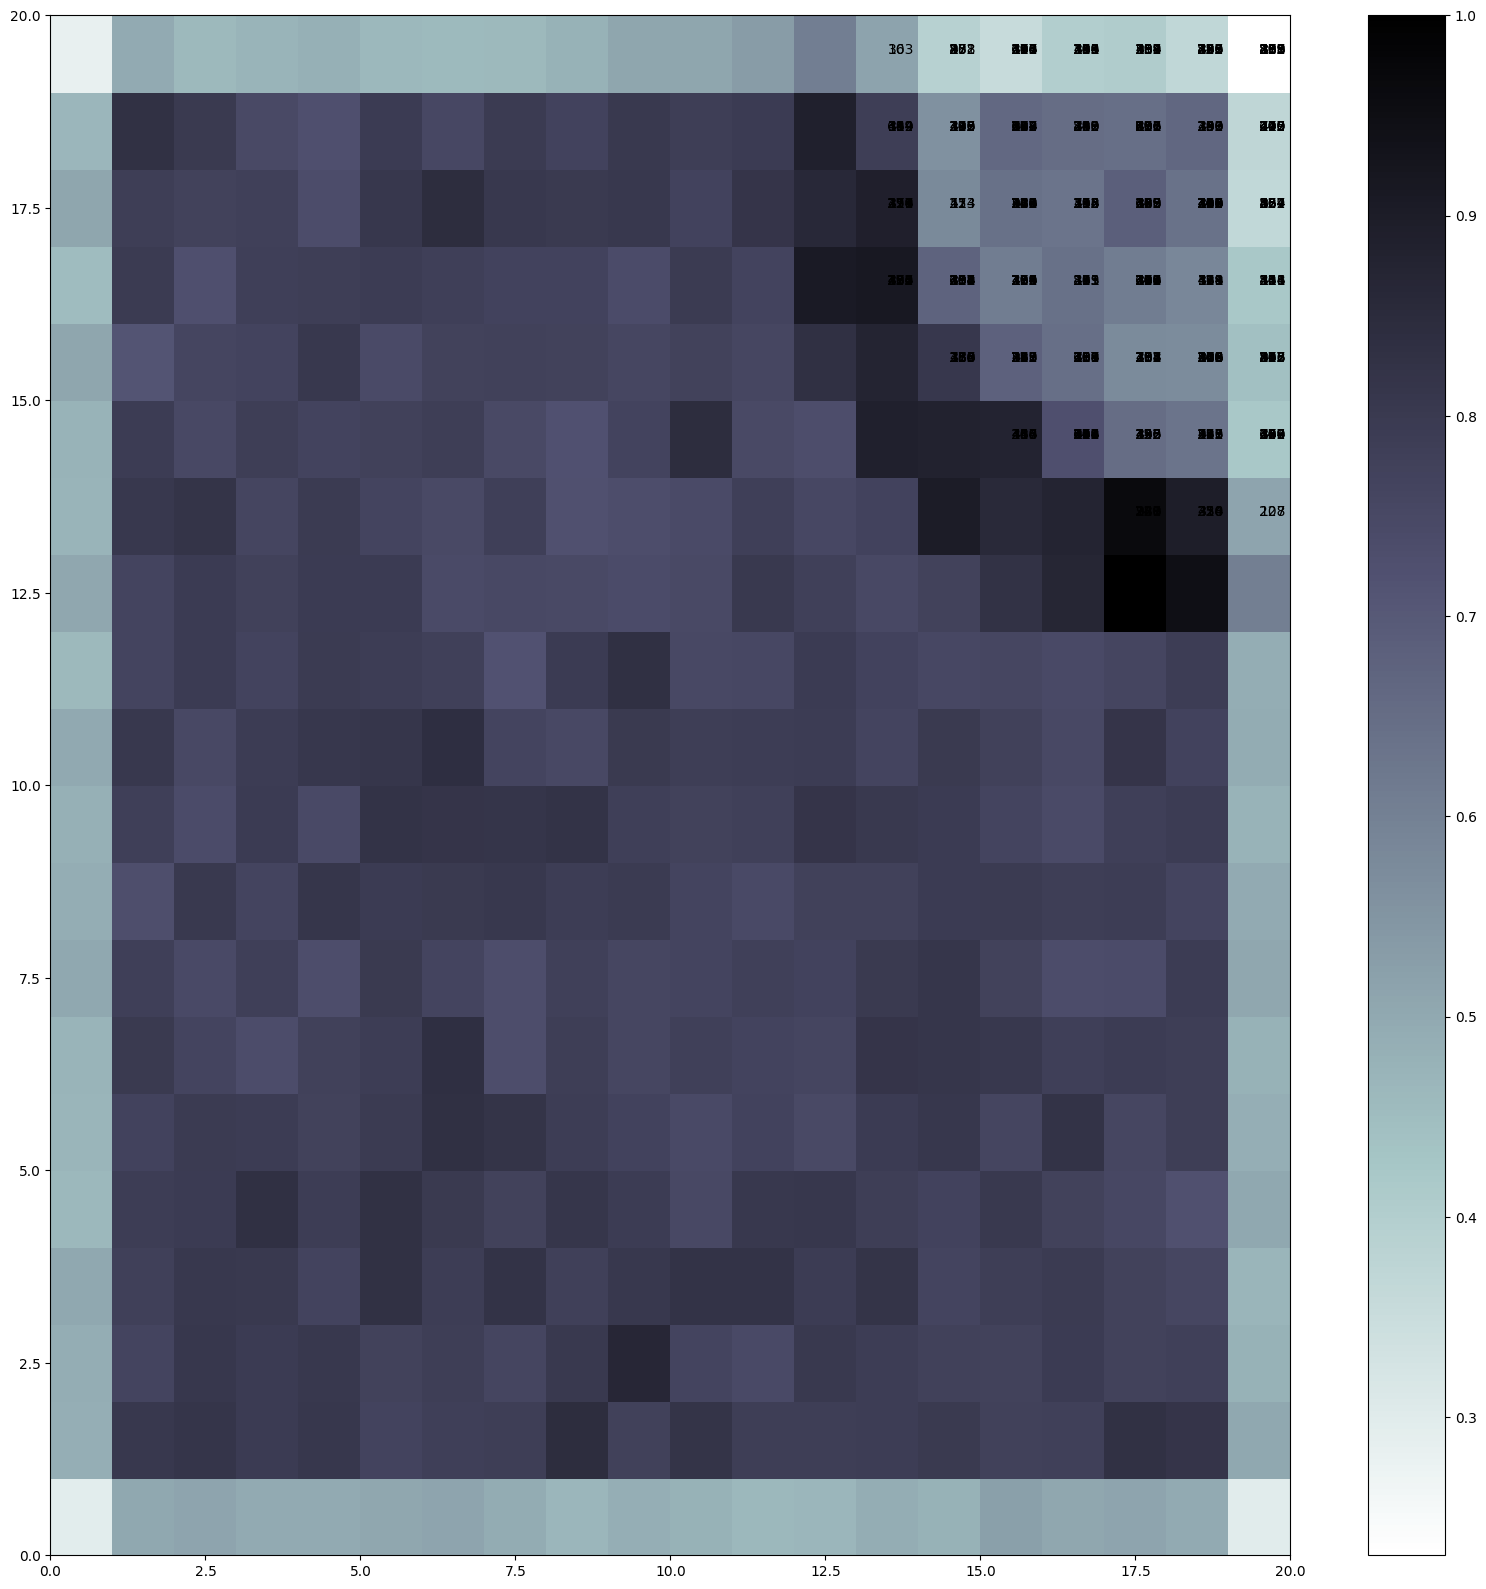

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

variables = {
    'Velocity': {'unit': 'm/s', 'preprocessing': 'sliding window', 'type': 'Vector of length 10'},
    'Accelerator Pedal Position': {'unit': '%', 'preprocessing': 'sliding window', 'type': 'Vector of length 10'},
    'Brake Pedal Position': {'unit': '%', 'preprocessing': 'sliding window', 'type': 'Vector of length 10'},
    'Fuel Consumed': {'unit': 'ml/s', 'preprocessing': 'Sum on sliding window', 'type': 'Scalar'},
    'Distance Travelled': {'unit': 'm', 'preprocessing': 'Sum on sliding window', 'type': 'Scalar'}
}
# Replace the dummy data with your actual data
velocity_data = np.random.rand(500, 10)  
accelerator_data = np.random.rand(500, 10)  
brake_data = np.random.rand(500, 10)  
fuel_data = np.random.rand(500, 1)  
distance_data = np.random.rand(500, 1)  

data = np.c_[velocity_data, accelerator_data, brake_data, fuel_data, distance_data]
data = data / data.max(axis=0)  # scaling data

print(data)
# Define the SOM parameters
map_dimensions = (20, 20)
num_iterations = 700
learning_rate = 0.5

# Initialize the SOM model
som = MiniSom(map_dimensions[0], map_dimensions[1], data.shape[1], sigma=1.0, learning_rate=learning_rate)

# Train the SOM on the data
som.train_random(data, num_iterations)

# Visualize the SOM
plt.figure(figsize=(map_dimensions[0], map_dimensions[1]))
for i, x in enumerate(data):
    winner = som.winner(x)
    plt.text(winner[0]+.5, winner[1]+.5, str(i), color='k')
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()
plt.show()

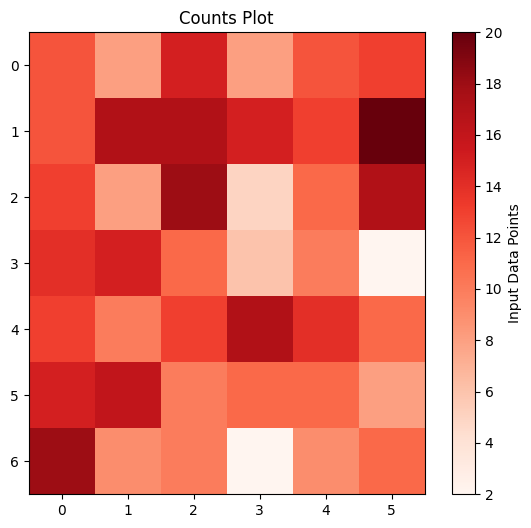

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


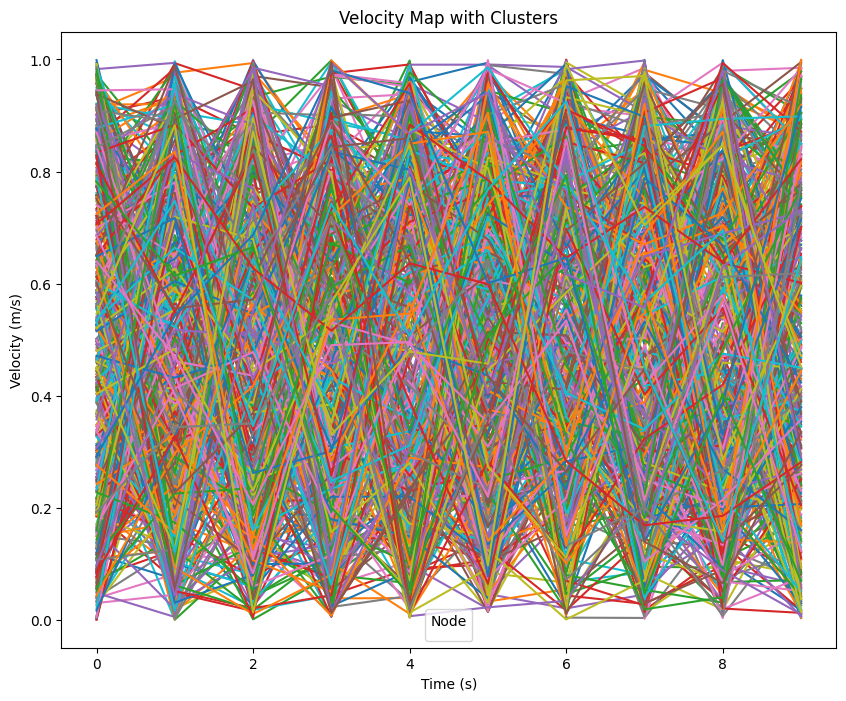

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


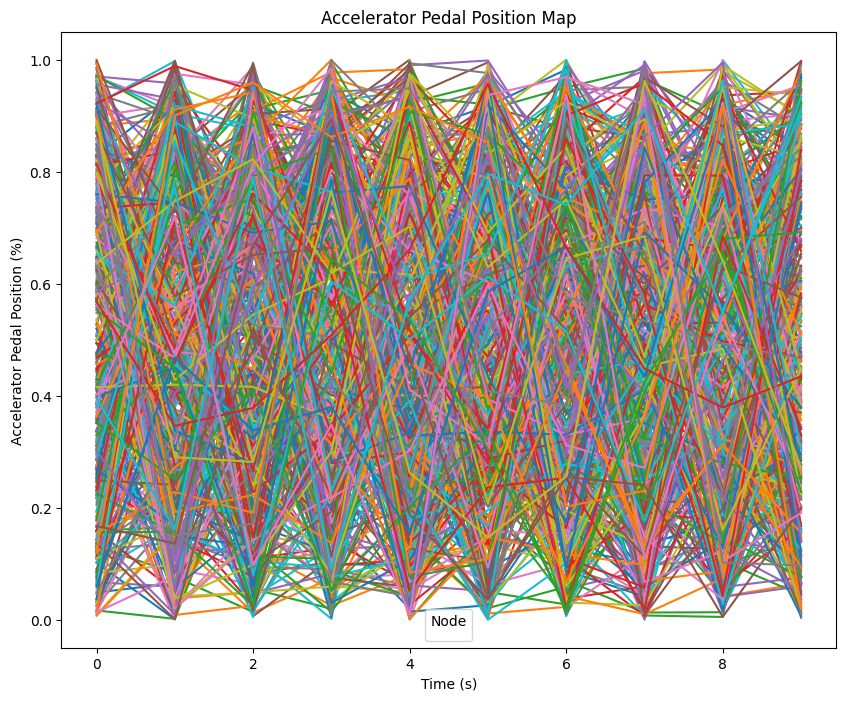

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


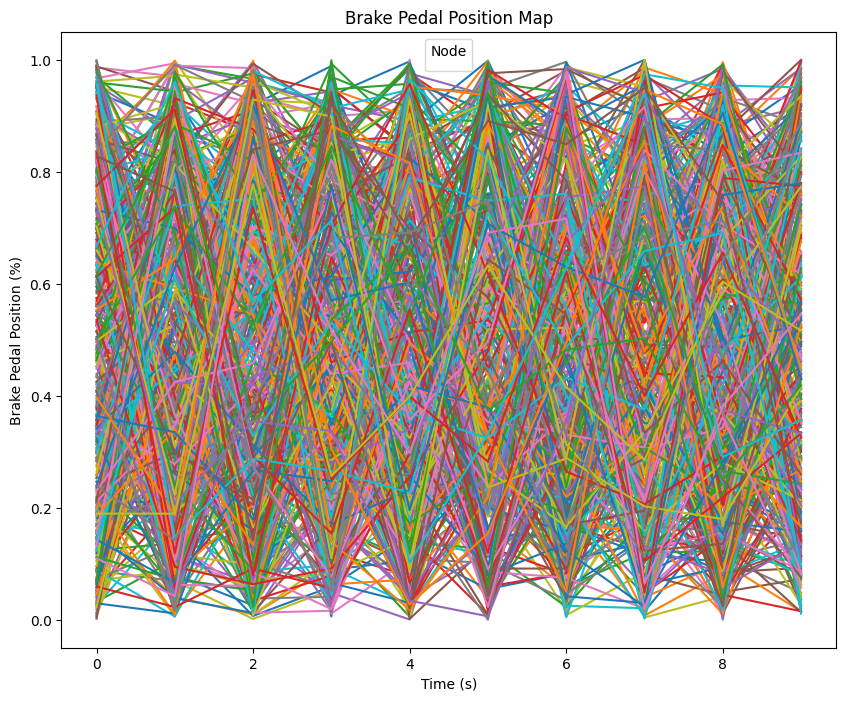

In [30]:
import matplotlib.pyplot as plt


# Fig 5: Counts Plot
plt.figure(figsize=(7, 6))
counts_data = som.win_map(data)
counts = np.array([len(v) for k, v in counts_data.items()])

# Reshape the counts array to maintain the same number of elements (48 nodes)
num_nodes = len(counts)
rows, cols = 7,6  # Adjust these values as needed
counts_grid = counts.reshape(rows, cols)

plt.imshow(counts_grid, cmap='Reds', interpolation='nearest')
plt.colorbar(label='Input Data Points')
plt.title('Counts Plot')
plt.show()

# Fig 6: Velocty Map with Clusters
plt.figure(figsize=(10, 8))
for node, data in enumerate(velocity_data):
    plt.plot(data)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity Map with Clusters')
plt.legend(title='Node')
plt.show()

# Fig 7: Accelerator Pedal Position Map
plt.figure(figsize=(10, 8))
for node, data in enumerate(accelerator_data):
    plt.plot(data)
plt.xlabel('Time (s)')
plt.ylabel('Accelerator Pedal Position (%)')
plt.title('Accelerator Pedal Position Map')
plt.legend(title='Node')
plt.show()

# Fig 8: Brake Pedal Position Map
plt.figure(figsize=(10, 8))
for node, data in enumerate(brake_data):
    plt.plot(data)
plt.xlabel('Time (s)')
plt.ylabel('Brake Pedal Position (%)')
plt.title('Brake Pedal Position Map')
plt.legend(title='Node')
plt.show()

## SOM for Breast Cancer Dataset

In [31]:
from minisom import MiniSom
from sklearn.datasets import load_breast_cancer
import time

In [32]:
som_grid_rows = 30
som_grid_columns = 20
iterations = 500
sigma = 1
learning_rate = 0.5 

In [33]:

# Load the breast cancer dataset
breast_cancer_data = load_breast_cancer()

# Access the data and target separately
data = breast_cancer_data.data
target = breast_cancer_data.target


In [34]:
som = MiniSom(x = som_grid_rows,
             y = som_grid_columns,
             input_len = data.shape[1],
             sigma = sigma,
             learning_rate = learning_rate)
som.random_weights_init(data)

In [35]:
start_time = time.time()
som.train_random(data,iterations)
elapsed_time = time.time()-start_time
print(elapsed_time, " seconds")

0.05599832534790039  seconds


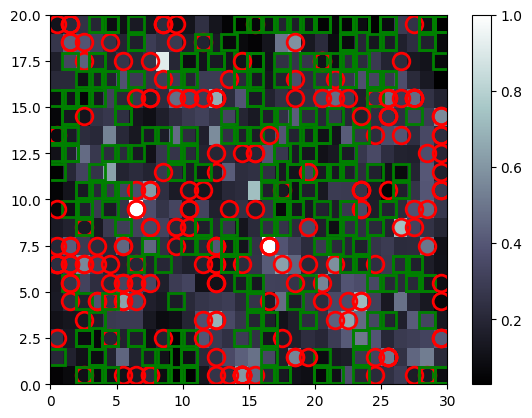

In [36]:
from pylab import plot,axis,show,pcolor,colorbar,bone
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o','s','D']
colors = ['r','g','b']

for cnt,xx in enumerate(data):
    w = som.winner(xx)
    plot(w[0]+.5,w[1]+.5,markers[target[cnt]],markerfacecolor = 'None',
        markeredgecolor = colors[target[cnt]],markersize = 12, markeredgewidth = 2)
axis([0,som._weights.shape[0],0,som._weights.shape[1]])
show()

### red - malignant tumors,green - nonmalignant tumors


## CCA on breast cancer dataset

Canonical Correlations: [[-0.26880789]
 [ 0.96319381]]


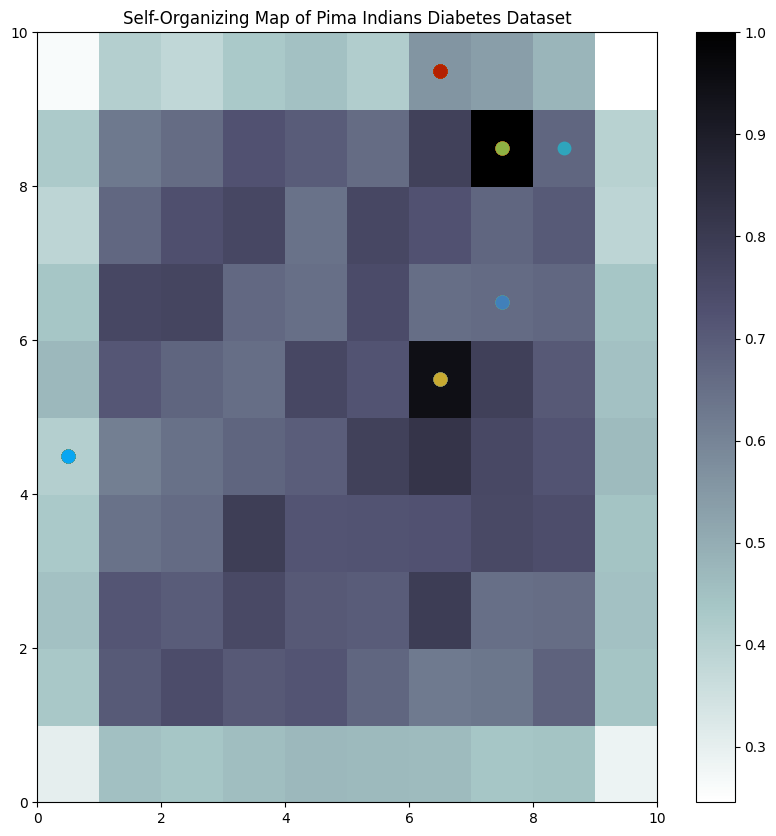

In [39]:
import numpy as np
from sklearn.datasets import load_diabetes
from minisom import MiniSom
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt

diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target

data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

map_size = (10, 10)
input_len = data.shape[1]

som = MiniSom(map_size[0], map_size[1], input_len, sigma=0.3, learning_rate=0.5)

som.train_random(data, 1000)

som_weights = np.array([som.winner(x) for x in data])

flattened_weights = som_weights.reshape(-1, 2)

cca = CCA(n_components=1)
cca.fit(flattened_weights, target)

som_canonical, target_canonical = cca.transform(flattened_weights, target)

print("Canonical Correlations:", cca.x_rotations_)

plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

for i, (x, t) in enumerate(zip(data, target)):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor=plt.cm.jet(t / 200.), markeredgecolor='None', markersize=10, alpha=0.5)

plt.title('Self-Organizing Map of Pima Indians Diabetes Dataset')
plt.show()


## implementation of kohonnen SOM for the CCA of iris_dataset

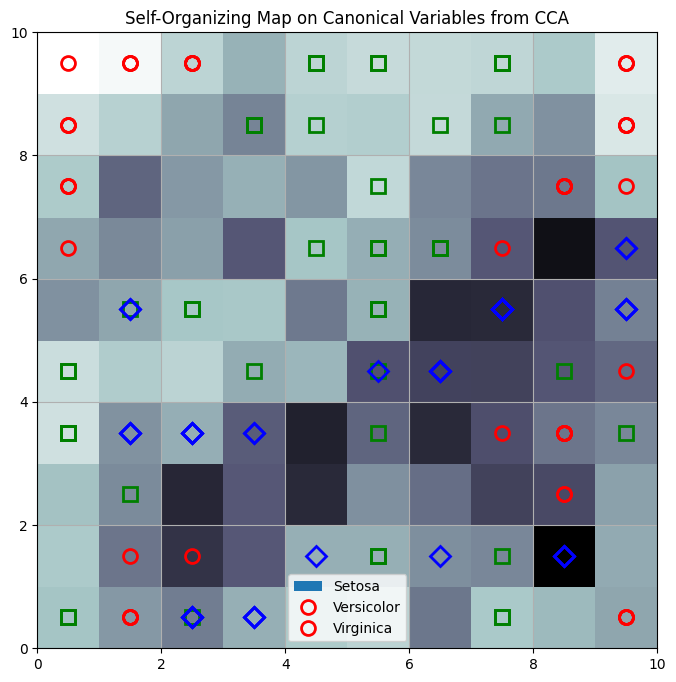

In [38]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
from minisom import MiniSom
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  
y = iris.target  


cca = CCA(n_components=1)
cca.fit(X, y)
X_c, y_c = cca.transform(X, y)


som = MiniSom(x=10, y=10, input_len=1, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_c)
som.train_random(data=X_c, num_iteration=100)

# Visualize the SOM clusters
plt.figure(figsize=(8, 8))
plt.title('Self-Organizing Map on Canonical Variables from CCA')
plt.pcolor(som.distance_map().T, cmap='bone_r')  
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b']
for i, x in enumerate(X_c):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markerfacecolor='None',
             markeredgecolor=colors[y[i]], markersize=10, markeredgewidth=2)
plt.legend(['Setosa', 'Versicolor', 'Virginica'])
plt.grid()
plt.show()
